In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_excel('Train.xlsx')
df_test = pd.read_excel('Test.xlsx')


In [3]:
print("Train : {}\nTest : {}".format(df_train.shape,df_test.shape))

Train : (10683, 11)
Test : (2671, 10)


#### Checking the first five values of the Training and Test data so as to figure out what features are present in the data

In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df_total = df_train.append(df_test,sort = False)

In [7]:
df_total.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
Airline            13354 non-null object
Date_of_Journey    13354 non-null object
Source             13354 non-null object
Destination        13354 non-null object
Route              13353 non-null object
Dep_Time           13354 non-null object
Arrival_Time       13354 non-null object
Duration           13354 non-null object
Total_Stops        13353 non-null object
Additional_Info    13354 non-null object
Price              10683 non-null float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [9]:
df_total.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [10]:
df_total.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Feature Engineering

### Lets split the Date_of_Journey column into date,month and year

In [11]:
df_total['Date'] = df_total['Date_of_Journey'].str.split('/').str[0]
df_total['Month'] = df_total['Date_of_Journey'].str.split('/').str[1]
df_total['Year'] = df_total['Date_of_Journey'].str.split('/').str[2]

In [12]:
df_total.drop(['Date_of_Journey'],axis= 1,inplace = True)
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [13]:
df_total['Arrival_Time'] = df_total['Arrival_Time'].str.split(' ').str[0]

In [14]:
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [15]:
df_total['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [16]:
df_total['Stops'] = df_total['Total_Stops'].replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4])

In [17]:
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,2.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019,2.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,1.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,1.0


In [18]:
df_total.drop(['Total_Stops'],axis = 1,inplace =  True)

In [19]:
df_total.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Stops                 1
dtype: int64

In [20]:
df_total[df_total['Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,No info,7480.0,6,05,2019,NaN


In [21]:
df_total['Stops'].fillna(value = 1,inplace = True)

In [22]:
df_total.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,03,2019,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,05,2019,2.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,06,2019,2.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,05,2019,1.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,01,03,2019,1.0


In [23]:
df_total['Dep_hour'] = df_total['Dep_Time'].str.split(':').str[0]
df_total['Dep_minute'] = df_total['Dep_Time'].str.split(':').str[1]


In [24]:
df_total.drop(['Dep_Time'],axis=1,inplace = True)

In [25]:
df_total.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,No info,3897.0,24,03,2019,0.0,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,No info,7662.0,1,05,2019,2.0,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,No info,13882.0,9,06,2019,2.0,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,No info,6218.0,12,05,2019,1.0,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,No info,13302.0,01,03,2019,1.0,16,50


In [26]:
df_total['Arrival_hour'] = df_total['Arrival_Time'].str.split(':').str[0]
df_total['Arrival_minute'] = df_total['Arrival_Time'].str.split(':').str[1]


In [27]:
df_total.drop(['Arrival_Time'],axis = 1,inplace = True)

In [28]:
df_total.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,03,2019,0.0,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,05,2019,2.0,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,06,2019,2.0,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,05,2019,1.0,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,01,03,2019,1.0,16,50,21,35


In [29]:
df_total.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
Stops              float64
Dep_hour            object
Dep_minute          object
Arrival_hour        object
Arrival_minute      object
dtype: object

In [30]:
df_total['Date'] = df_total['Date'].astype(int)
df_total['Month'] = df_total['Month'].astype(int)
df_total['Year'] = df_total['Year'].astype(int)
df_total['Stops'] = df_total['Stops'].astype(int)
df_total['Dep_hour'] = df_total['Dep_hour'].astype(int)
df_total['Dep_minute'] = df_total['Dep_minute'].astype(int)
df_total['Arrival_hour'] = df_total['Arrival_hour'].astype(int)
df_total['Arrival_minute'] = df_total['Arrival_minute'].astype(int)


In [31]:
df_total.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Dep_hour             int32
Dep_minute           int32
Arrival_hour         int32
Arrival_minute       int32
dtype: object

### Splitting the Route feature

*As the **maximum number of stops is 4**, so we can split the Route feature into 5 feature.*

In [32]:
df_total['Route_1'] = df_total['Route'].str.split('→').str[0]
df_total['Route_2'] = df_total['Route'].str.split('→').str[1]
df_total['Route_3'] = df_total['Route'].str.split('→').str[2]
df_total['Route_4'] = df_total['Route'].str.split('→').str[3]
df_total['Route_5'] = df_total['Route'].str.split('→').str[4]


In [33]:
df_total.drop(['Route'],axis = 1,inplace = True)

In [34]:
df_total.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,16,50,21,35,BLR,NAG,DEL,NaN,NaN


In [35]:
df_total['Route_1'].fillna(value = 'None',inplace = True)
df_total['Route_2'].fillna(value = 'None',inplace = True)
df_total['Route_3'].fillna(value = 'None',inplace = True)
df_total['Route_4'].fillna(value = 'None',inplace = True)
df_total['Route_5'].fillna(value = 'None',inplace = True)


In [36]:
df_total.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Stops                 0
Dep_hour              0
Dep_minute            0
Arrival_hour          0
Arrival_minute        0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

#### Let's see how the price is distributed in the train data.

In [37]:
#import seaborn as sns

In [38]:
#sns.distplot(df_train['Price'])

In [39]:
df_train['Price'].mean()

9087.064120565385

In [40]:
df_total['Price'].fillna(value=(df_total['Price'].mean()),inplace = True)

In [41]:
df_total.head(10)

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,16,50,21,35,BLR,NAG,DEL,None,None
5,SpiceJet,Kolkata,Banglore,2h 25m,No info,3873.0,24,6,2019,0,9,0,11,25,CCU,BLR,None,None,None
6,Jet Airways,Banglore,New Delhi,15h 30m,In-flight meal not included,11087.0,12,3,2019,1,18,55,10,25,BLR,BOM,DEL,None,None
7,Jet Airways,Banglore,New Delhi,21h 5m,No info,22270.0,1,3,2019,1,8,0,5,5,BLR,BOM,DEL,None,None
8,Jet Airways,Banglore,New Delhi,25h 30m,In-flight meal not included,11087.0,12,3,2019,1,8,55,10,25,BLR,BOM,DEL,None,None
9,Multiple carriers,Delhi,Cochin,7h 50m,No info,8625.0,27,5,2019,1,11,25,19,15,DEL,BOM,COK,None,None


In [42]:
df_total['DurationHour'] = df_total['Duration'].str.split(' ').str[0].str.split('h').str[0]
df_total['DurationMinute'] = df_total['Duration'].str.split(' ').str[1].str.split('m').str[0]
df_total.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,...,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5,DurationHour,DurationMinute
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,...,20,1,10,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,...,50,13,15,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,...,25,4,25,DEL,LKO,BOM,COK,None,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,...,5,23,30,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,...,50,21,35,BLR,NAG,DEL,None,None,4,45


In [43]:
df_total.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Additional_Info       0
Price                 0
Date                  0
Month                 0
Year                  0
Stops                 0
Dep_hour              0
Dep_minute            0
Arrival_hour          0
Arrival_minute        0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
DurationHour          0
DurationMinute     1286
dtype: int64

In [44]:
df_total['DurationMinute'].fillna(value = 0,inplace = True)

In [45]:
df_total['DurationMinute'] = df_total['DurationMinute'].astype(int)

In [46]:
df_total['DurationMinute'] = df_total['DurationMinute']/60

In [47]:
df_total.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,...,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5,DurationHour,DurationMinute
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,...,20,1,10,BLR,DEL,None,None,None,2,0.833333
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,...,50,13,15,CCU,IXR,BBI,BLR,None,7,0.416667
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,...,25,4,25,DEL,LKO,BOM,COK,None,19,0.000000
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,...,5,23,30,CCU,NAG,BLR,None,None,5,0.416667
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,...,50,21,35,BLR,NAG,DEL,None,None,4,0.750000


In [48]:
df_total['DurationHour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
42       2
5m       2
40       2
47       2
41       1
Name: DurationHour, dtype: int64

In [49]:
df_total['DurationHour'] = df_total['DurationHour'].replace('5m',5)

In [50]:
df_total['DurationHour'] = df_total['DurationHour'].astype(int)

In [51]:
df_total['Duration'] = df_total['DurationHour'] + df_total['DurationMinute']


In [52]:
df_total.drop(['DurationHour','DurationMinute'],axis = 1,inplace = True)

In [53]:
df_total.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2.833333,No info,3897.0,24,3,2019,0,22,20,1,10,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7.416667,No info,7662.0,1,5,2019,2,5,50,13,15,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19.000000,No info,13882.0,9,6,2019,2,9,25,4,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5.416667,No info,6218.0,12,5,2019,1,18,5,23,30,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4.750000,No info,13302.0,1,3,2019,1,16,50,21,35,BLR,NAG,DEL,None,None


In [54]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()


In [55]:
df_total.dtypes

Airline             object
Source              object
Destination         object
Duration           float64
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stops                int32
Dep_hour             int32
Dep_minute           int32
Arrival_hour         int32
Arrival_minute       int32
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Route_5             object
dtype: object

In [56]:
df_total['Airline'] = Le.fit_transform(df_total['Airline'])
df_total['Source'] = Le.fit_transform(df_total['Source'])
df_total['Destination'] = Le.fit_transform(df_total['Destination'])
df_total['Additional_Info'] = Le.fit_transform(df_total['Additional_Info'])
df_total['Route_1'] = Le.fit_transform(df_total['Route_1'])
df_total['Route_2'] = Le.fit_transform(df_total['Route_2'])
df_total['Route_3'] = Le.fit_transform(df_total['Route_3'])
df_total['Route_4'] = Le.fit_transform(df_total['Route_4'])
df_total['Route_5'] = Le.fit_transform(df_total['Route_5'])



In [57]:
df_total.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,2.833333,8,3897.0,24,3,2019,0,22,20,1,10,0,13,30,13,5
1,1,3,0,7.416667,8,7662.0,1,5,2019,2,5,50,13,15,2,25,1,3,5
2,4,2,1,19.000000,8,13882.0,9,6,2019,2,9,25,4,25,3,32,4,5,5
3,3,3,0,5.416667,8,6218.0,12,5,2019,1,18,5,23,30,2,34,3,13,5
4,3,0,5,4.750000,8,13302.0,1,3,2019,1,16,50,21,35,0,34,8,13,5


### Feature Selection

In [59]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [60]:
df_train = df_total[:10683]
df_test = df_total[10683:]


In [61]:
X = df_train.drop(['Price'],axis =1)
y = df_train.Price

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [63]:
model = SelectFromModel(Lasso(alpha = 0.005))

In [64]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [65]:
model.get_params

<bound method BaseEstimator.get_params of SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)>

In [66]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [69]:
selected_features = X_train.columns[model.get_support()]
selected_features

Index(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info',
       'Date', 'Month', 'Stops', 'Dep_hour', 'Dep_minute', 'Arrival_hour',
       'Arrival_minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [71]:
feature_rejected = X_train.columns[model.get_support() == False]
feature_rejected

Index(['Year'], dtype='object')

* *Now we will drop the **Year** feature from the training data*

In [72]:
X_train = X_train.drop(['Year'],axis = 1)
X_test = X_test.drop(['Year'], axis = 1)


### 1. Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [100]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
y_pred = lr.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error

print('Mean Squared Error : {}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Error : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Mean Squared Error : 9164113.07972404
Root Mean Squared Error : 3027.2286137198225


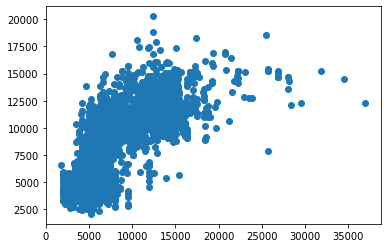

In [104]:
plt.scatter(y_test,y_pred)

### 2. Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [106]:
y_pred = dt.predict(X_test)

In [107]:

print('Mean Squared Error : {}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Error : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Mean Squared Error : 2679761.5276131043
Root Mean Squared Error : 1636.997717656657


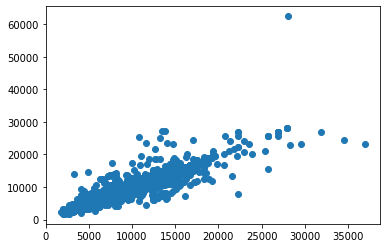

In [108]:
plt.scatter(y_test,y_pred)

### 3. Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [110]:
rf.fit(X_train,y_train)

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [111]:
y_pred = rf.predict(X_test)

In [112]:
print('Mean Squared Error : {}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Error : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

Mean Squared Error : 1816405.1164763814
Root Mean Squared Error : 1347.7407452757304


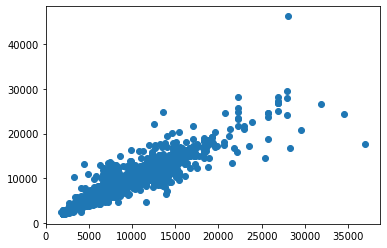

In [113]:
plt.scatter(y_test,y_pred)

##### Lets try some different parameters foro Random forest

In [114]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [115]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [116]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [117]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [118]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 19.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


Mean Squared Error : 1692380.2838796952
Root Mean Squared Error : 1300.915171669427


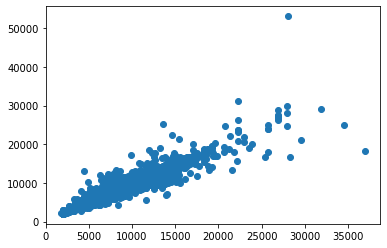

In [120]:
y_pred=rf_random.predict(X_test)

print('Mean Squared Error : {}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Error : {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

print(plt.scatter(y_test,y_pred))